# Support Vector Machine - Salary

### Prepare a classification model using SVM for salary data 

#### Input variables:

#### Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual

### Step-1 : Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Importing training dataset
salary_train = pd.read_csv("SalaryData_Train(1).csv",sep=",")
salary_train.shape

(30161, 14)

In [3]:
# Importing testing dataset
salary_test = pd.read_csv("SalaryData_Test(1).csv",sep=",")
salary_test.shape

(15060, 14)

In [4]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(drop='index',inplace=True)
raw_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### Exploring the dataset

In [5]:
# Displaying first ten records
raw_data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Shape of the data
raw_data.shape

(45221, 14)

In [7]:
# Summary of the data
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check the data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


#### Modifying the dataset

In [9]:
raw_data = raw_data.rename(columns={"workclass":"wrk_cls","education":"edu","educationno":"edu_no",
                                "maritalstatus":"marital","occupation":"job","relationship":"rel_ship","capitalgain":"cap_gain",
                                "capitalloss":"cap_loss","hoursperweek":"hrs_per_wk","Salary":"salary"})
raw_data

,age,wrk_cls,edu,edu_no,marital,job,rel_ship,race,sex,cap_gain,cap_loss,hrs_per_wk,native,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Step-2.2 : Handling missing values

In [10]:
# Check for Null values
raw_data.isnull().sum()

age           0
wrk_cls       0
edu           0
edu_no        0
marital       0
job           0
rel_ship      0
race          0
sex           0
cap_gain      0
cap_loss      0
hrs_per_wk    0
native        0
salary        0
dtype: int64

In [11]:
# Check for duplicate values
raw_data[raw_data.duplicated()].shape

(5982, 14)

In [12]:
raw_data[raw_data.duplicated()]

,age,wrk_cls,edu,edu_no,marital,job,rel_ship,race,sex,cap_gain,cap_loss,hrs_per_wk,native,salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [13]:
raw_data = raw_data.drop_duplicates()

In [14]:
raw_data.reset_index(inplace=True,drop=True)
raw_data

,age,wrk_cls,edu,edu_no,marital,job,rel_ship,race,sex,cap_gain,cap_loss,hrs_per_wk,native,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39234,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
39235,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
39236,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
39237,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Step-2.3 : Exploring data using Visualisation

#### Differentiate Categorical and Numerical features

In [15]:
raw_data_cat = raw_data.select_dtypes(include=['object'])
raw_data_cat

,wrk_cls,edu,marital,job,rel_ship,race,sex,native,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
39234,Local-gov,Masters,Divorced,Other-service,Not-in-family,White,Male,United-States,<=50K
39235,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
39236,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
39237,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [16]:
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
numerical_features

['age', 'edu_no', 'cap_gain', 'cap_loss', 'hrs_per_wk']

In [17]:
raw_data_num = raw_data[numerical_features]
raw_data_num

,age,edu_no,cap_gain,cap_loss,hrs_per_wk
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
39234,48,14,0,0,40
39235,33,13,0,0,40
39236,39,13,0,0,36
39237,44,13,5455,0,40


#### Differentiate Discrete and Continuous features
+ Numerical variables are usually of 2 types 
+ Discrete features and continuous features

In [18]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
discrete_feature

['edu_no']

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature

['age', 'cap_gain', 'cap_loss', 'hrs_per_wk']

In [20]:
raw_data_cont = raw_data_num[continuous_feature]
raw_data_cont

,age,cap_gain,cap_loss,hrs_per_wk
0,39,2174,0,40
1,50,0,0,13
2,38,0,0,40
3,53,0,0,40
4,28,0,0,40
...,...,...,...,...
39234,48,0,0,40
39235,33,0,0,40
39236,39,0,0,36
39237,44,5455,0,40


#### Visualizing continuous features

#### Histogram

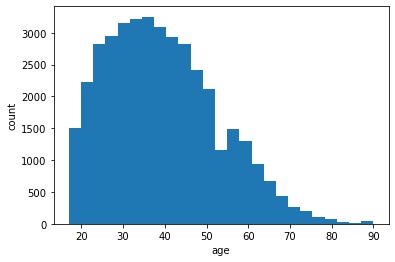

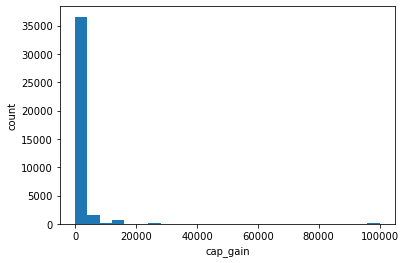

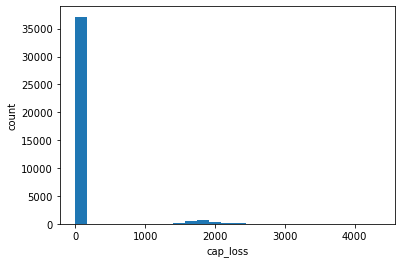

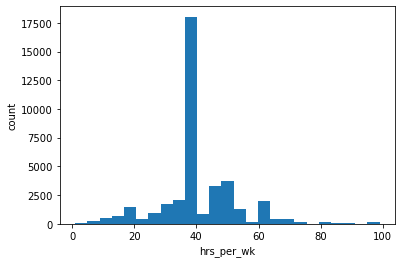

In [21]:
for feature in raw_data_cont.columns:
    plt.figure()
    plt.hist(raw_data_cont[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Boxplot

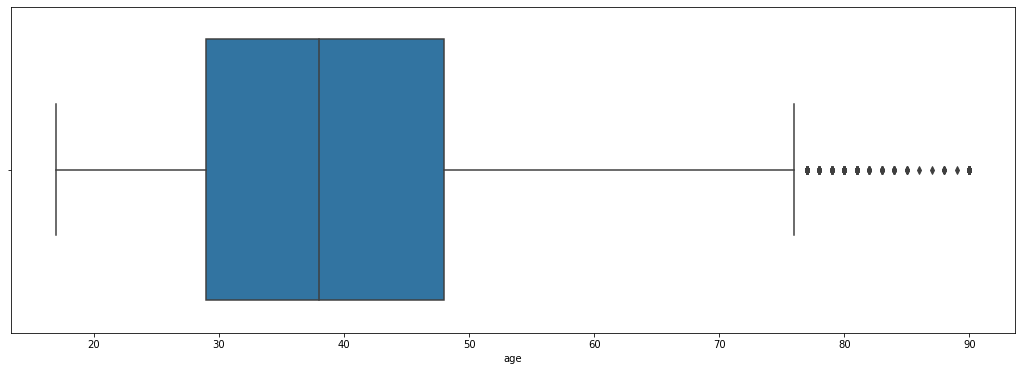

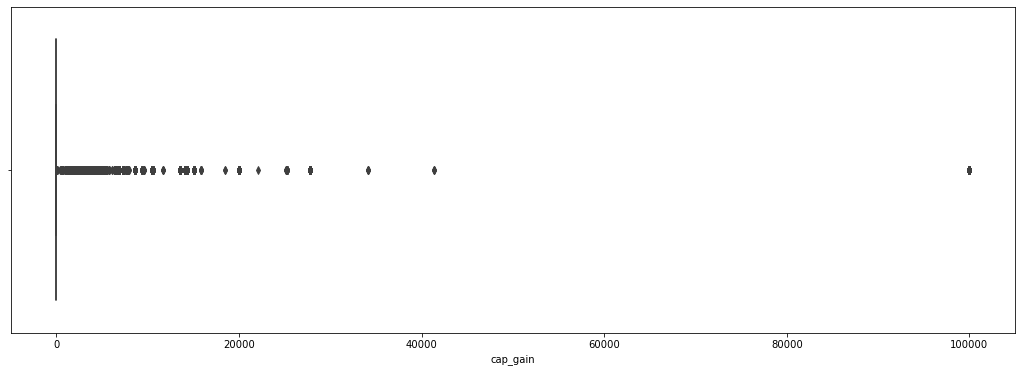

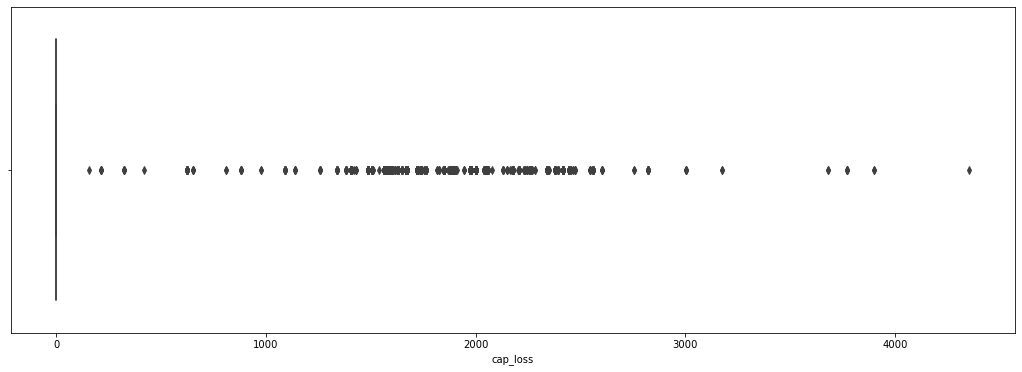

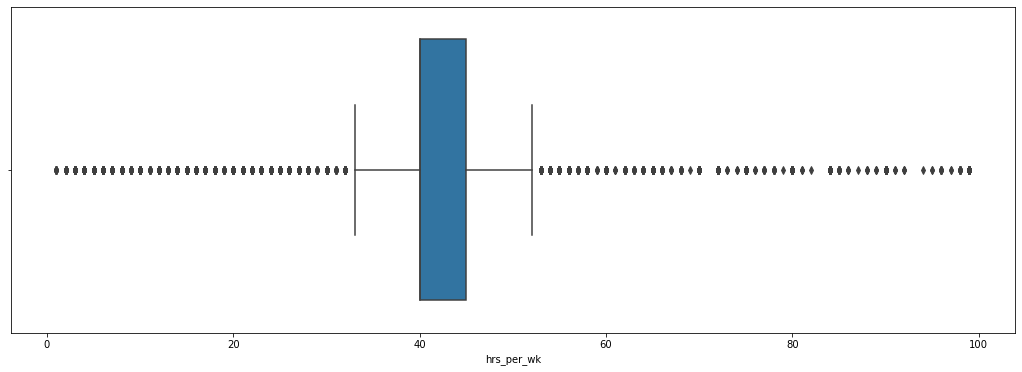

In [22]:
for feature in raw_data_cont.columns:
    plt.figure(figsize=(18,6))
    sb.boxplot(raw_data_cont[feature])

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building.

#### Correlation and Heat map

In [23]:
# Checking for Correlation between variables
raw_data_cont.corr()

,age,cap_gain,cap_loss,hrs_per_wk
age,1.000000,0.075495,0.049876,0.066927
cap_gain,0.075495,1.000000,-0.036791,0.082977
cap_loss,0.049876,-0.036791,1.000000,0.050638
hrs_per_wk,0.066927,0.082977,0.050638,1.000000


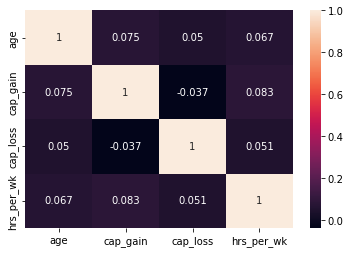

In [24]:
sb.heatmap(raw_data_cont.corr(),annot=True)
plt.show()

#### Visualizing catagorical features

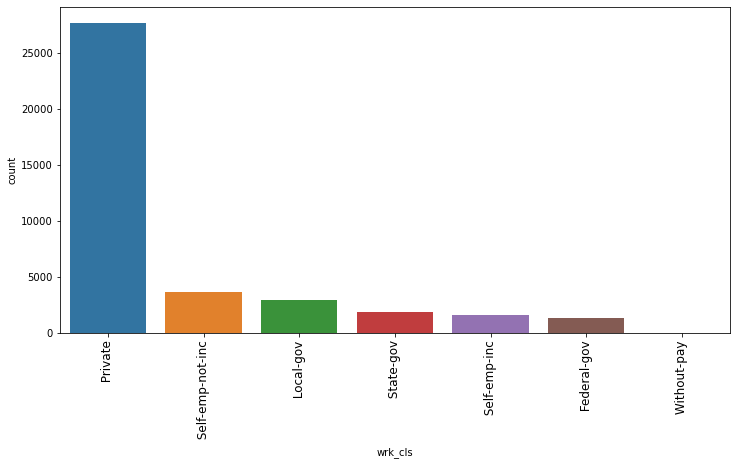

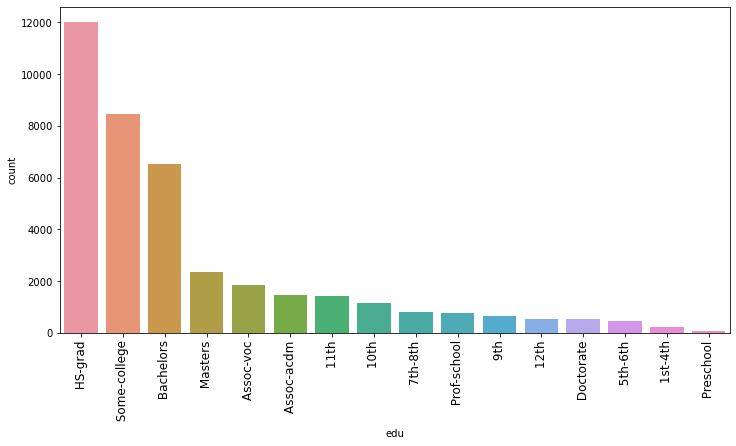

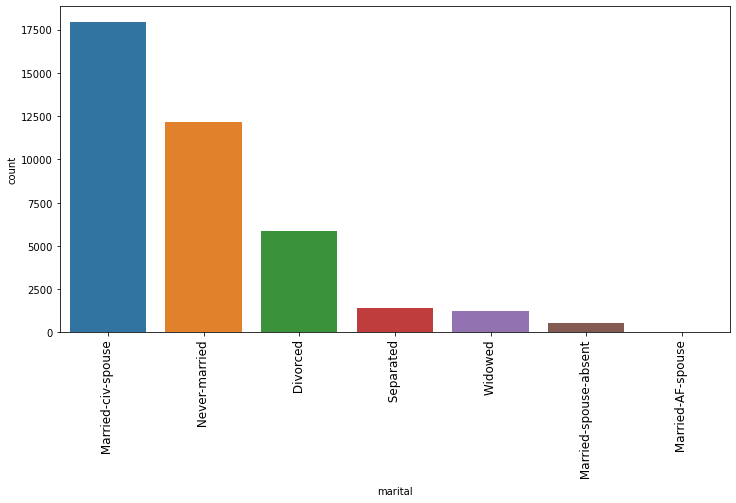

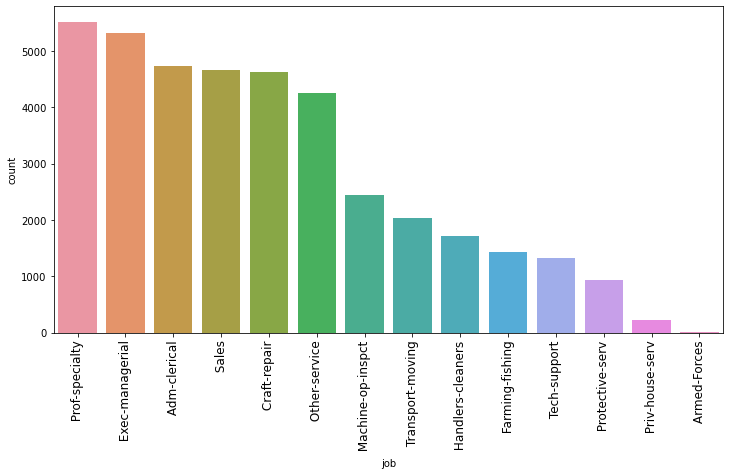

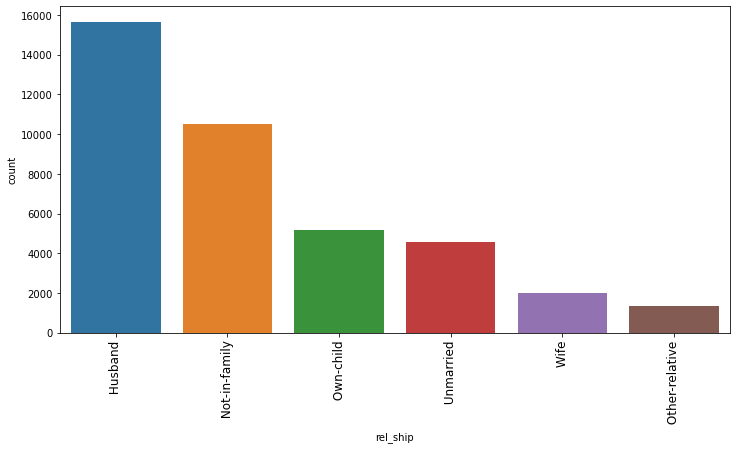

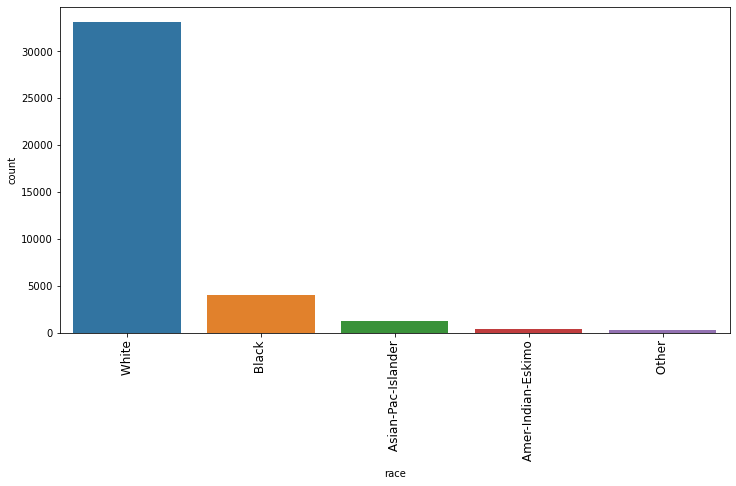

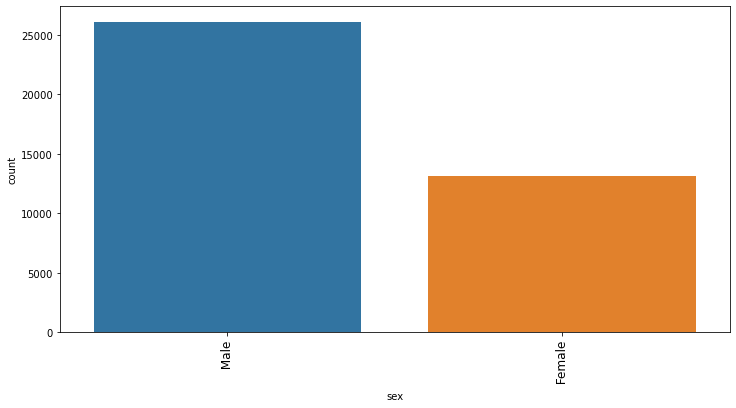

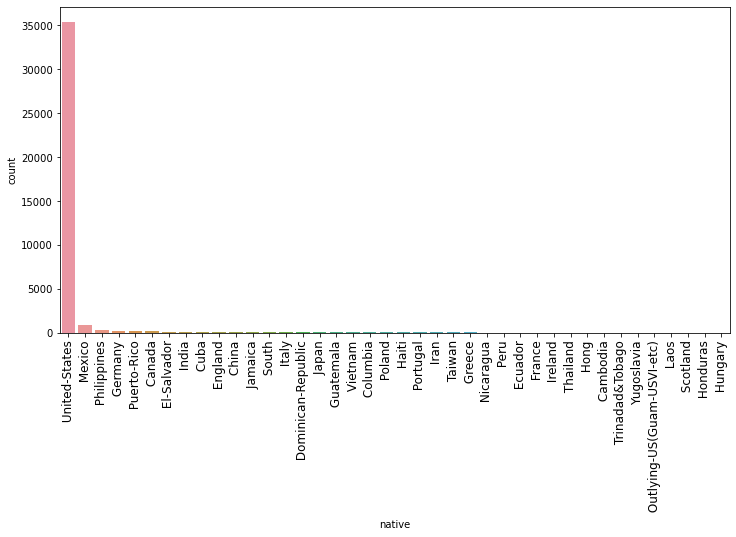

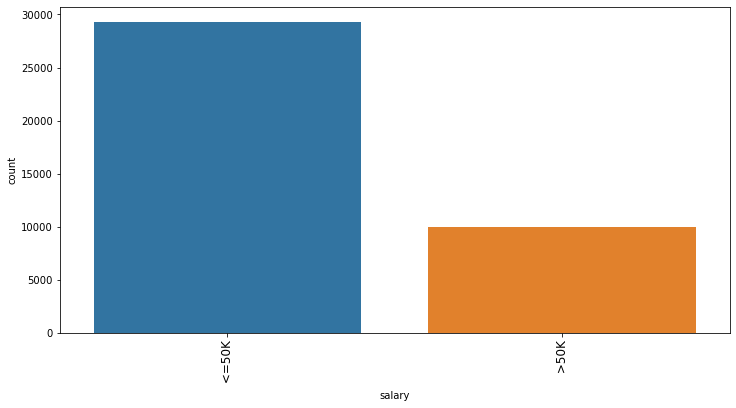

In [25]:
for i in raw_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.countplot(x=i, data=raw_data_cat, 
              order=raw_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

<Figure size 864x432 with 0 Axes>

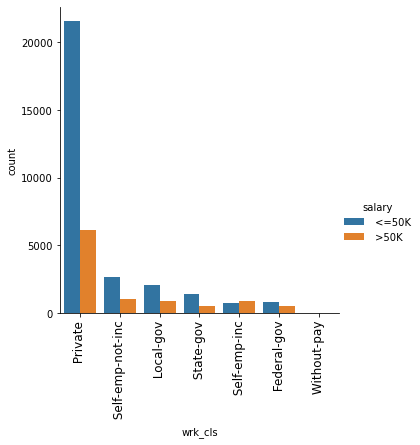

<Figure size 864x432 with 0 Axes>

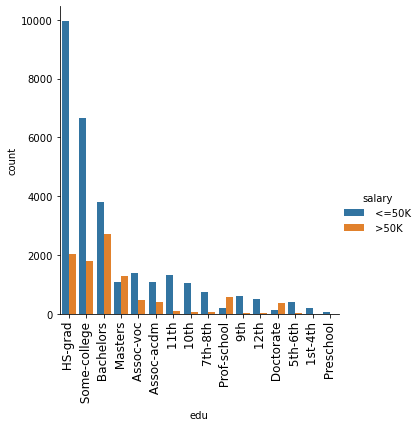

<Figure size 864x432 with 0 Axes>

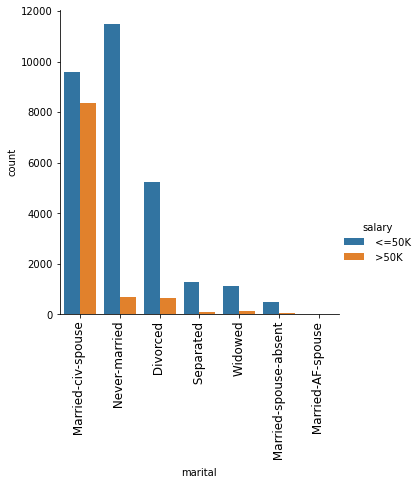

<Figure size 864x432 with 0 Axes>

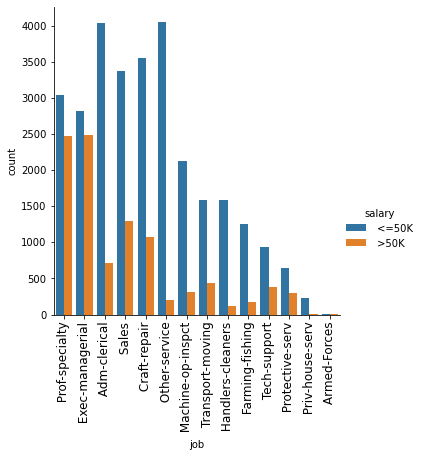

<Figure size 864x432 with 0 Axes>

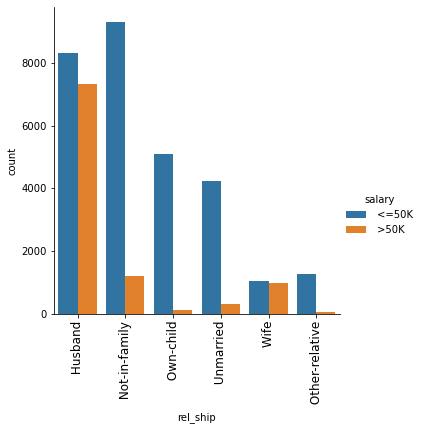

<Figure size 864x432 with 0 Axes>

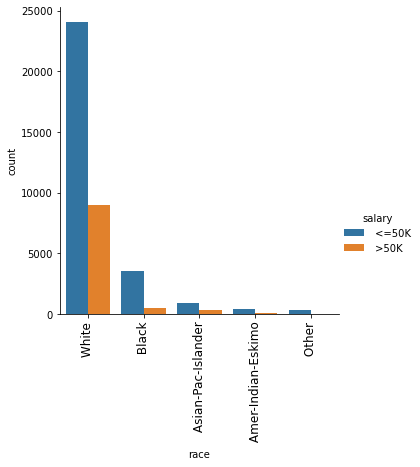

<Figure size 864x432 with 0 Axes>

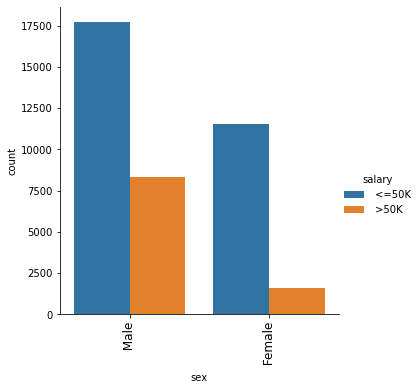

<Figure size 864x432 with 0 Axes>

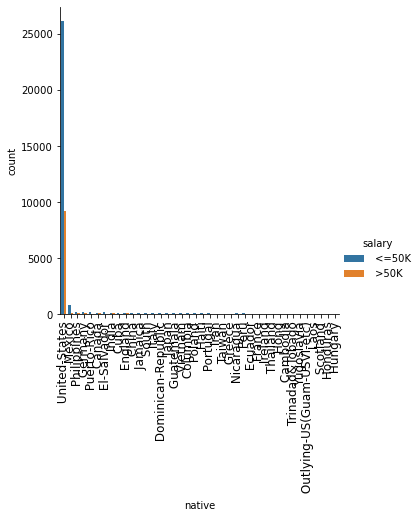

<Figure size 864x432 with 0 Axes>

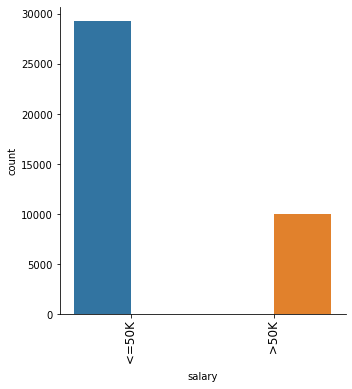

In [26]:
for i in raw_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.catplot(data=raw_data_cat,x=i,hue="salary",kind='count',
              order=raw_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

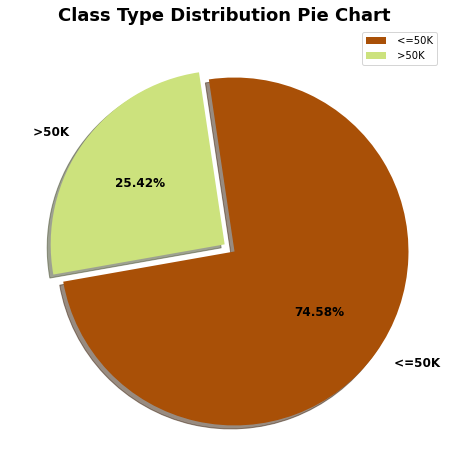

In [27]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['salary'].value_counts(),
       labels=raw_data.salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#A95007", "#CCE27D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Step-3 : Apply Label Encoding Technique

#### Converting categorical variables into numerical

In [28]:
raw_data_cat.columns

Index(['wrk_cls', 'edu', 'marital', 'job', 'rel_ship', 'race', 'sex', 'native',
       'salary'],
      dtype='object')

In [29]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= raw_data.copy()
# Encode labels in column 'species'.
df["edu"]=label_encoder.fit_transform(df["edu"])
df["wrk_cls"]=label_encoder.fit_transform(df["wrk_cls"])
df["marital"]=label_encoder.fit_transform(df["marital"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["job"]=label_encoder.fit_transform(df["job"])
df["rel_ship"]=label_encoder.fit_transform(df["rel_ship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['salary'] = np.where(df['salary'].str.contains(" >50K"), 1, 0)

df.head(10)

,age,wrk_cls,edu,edu_no,marital,job,rel_ship,race,sex,cap_gain,cap_loss,hrs_per_wk,native,salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df[continuous_feature]
df[continuous_feature] = scaler.fit_transform(features.values)
df.head()

,age,wrk_cls,edu,edu_no,marital,job,rel_ship,race,sex,cap_gain,cap_loss,hrs_per_wk,native,salary
0,-0.023268,5,9,13,4,0,1,4,1,0.115168,-0.234655,-0.096815,37,0
1,0.803925,4,9,13,2,3,0,4,1,-0.156786,-0.234655,-2.264094,37,0
2,-0.098467,2,11,9,0,5,1,4,1,-0.156786,-0.234655,-0.096815,37,0
3,1.029523,2,1,7,2,5,0,2,1,-0.156786,-0.234655,-0.096815,37,0
4,-0.850460,2,9,13,2,9,5,2,0,-0.156786,-0.234655,-0.096815,4,0


### Step-4 : Split the data into training and testing data

In [31]:
x = df.drop('salary', 1)
y = df['salary']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [33]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (31391, 13)
Shape of x_test:  (7848, 13)
Shape of y_train:  (31391,)
Shape of y_test (7848,)


### Step-5 : Build a model using Support vector machines

### Step-5.1 : With Linear Kernel

In [34]:
model_lk = SVC(kernel = 'linear')
model_lk.fit(x_train,y_train)

SVC(kernel='linear')

With scaled input
Accuracy for Train data = 0.8044
Accuracy for Test data = 0.8033


Text(33.0, 0.5, 'Actual')

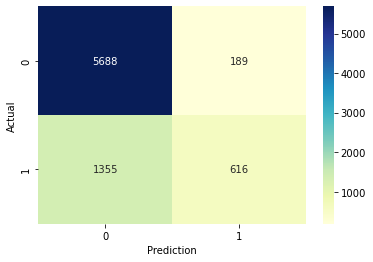

In [43]:
#testing the model
y_pred_train = model_lk.predict(x_train)
y_pred_test  = model_lk.predict(x_test)

print("With scaled input")
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),4))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),4))

confu_matrix_test_scaled = confusion_matrix(y_test,y_pred_test)

sb.heatmap(confu_matrix_test_scaled, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [68]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11360
           1       0.64      0.32      0.43      3700

    accuracy                           0.79     15060
   macro avg       0.73      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



### Step-5.2 : With Polynomial Kernel

In [44]:
model_pk = SVC(kernel = 'poly',degree=3)
model_pk.fit(x_train,y_train)

SVC(kernel='poly')

With scaled input
Accuracy for Train data = 0.8164
Accuracy for Test data = 0.8169


Text(33.0, 0.5, 'Actual')

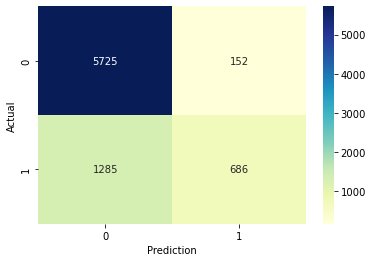

In [45]:
#testing the model
y_pred_train = model_pk.predict(x_train)
y_pred_test  = model_pk.predict(x_test)

print("With scaled input")
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),4))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),4))

confu_matrix_test_scaled = confusion_matrix(y_test,y_pred_test)

sb.heatmap(confu_matrix_test_scaled, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [47]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5877
           1       0.82      0.35      0.49      1971

    accuracy                           0.82      7848
   macro avg       0.82      0.66      0.69      7848
weighted avg       0.82      0.82      0.79      7848



### Step-5.3 : With Rbf Kernel

In [48]:
model_rbfk = SVC(kernel='rbf', C=1, gamma = 0.02)
model_rbfk.fit(x_train,y_train)

SVC(C=1, gamma=0.02)

With scaled input
Accuracy for Train data = 0.8412
Accuracy for Test data = 0.84


Text(33.0, 0.5, 'Actual')

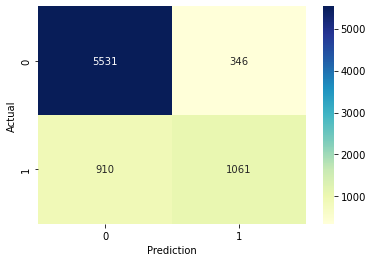

In [49]:
#testing the model
y_pred_train = model_rbfk.predict(x_train)
y_pred_test  = model_rbfk.predict(x_test)

print("With scaled input")
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),4))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),4))

confu_matrix_test_scaled = confusion_matrix(y_test,y_pred_test)

sb.heatmap(confu_matrix_test_scaled, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [50]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5877
           1       0.75      0.54      0.63      1971

    accuracy                           0.84      7848
   macro avg       0.81      0.74      0.76      7848
weighted avg       0.83      0.84      0.83      7848



### Step-5.4 : With Sigmoid Kernel

In [51]:
model_sk = SVC(kernel='sigmoid')
model_sk.fit(x_train,y_train)

SVC(kernel='sigmoid')

With scaled input
Accuracy for Train data = 0.7682
Accuracy for Test data = 0.7701


Text(33.0, 0.5, 'Actual')

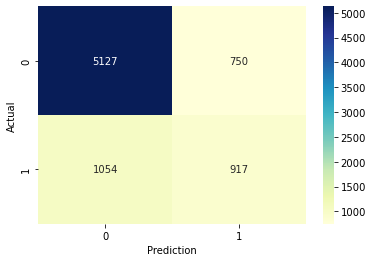

In [52]:
#testing the model
y_pred_train = model_sk.predict(x_train)
y_pred_test  = model_sk.predict(x_test)

print("With scaled input")
print("Accuracy for Train data =",round(accuracy_score(y_train, y_pred_train),4))
print("Accuracy for Test data =", round(accuracy_score(y_test, y_pred_test),4))

confu_matrix_test_scaled = confusion_matrix(y_test,y_pred_test)

sb.heatmap(confu_matrix_test_scaled, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [53]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5877
           1       0.55      0.47      0.50      1971

    accuracy                           0.77      7848
   macro avg       0.69      0.67      0.68      7848
weighted avg       0.76      0.77      0.76      7848



#### Model using RBF Kernel gave the highest accuracy. Hence select this model.